<a href="https://colab.research.google.com/github/xs4rahulgoel/Data-Science-Resources/blob/master/ANN_Improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

warnings.filterwarnings ('ignore')

In [34]:
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization



https://www.cs.toronto.edu/~kriz/cifar.html

https://www.kaggle.com/c/cifar-10/


In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

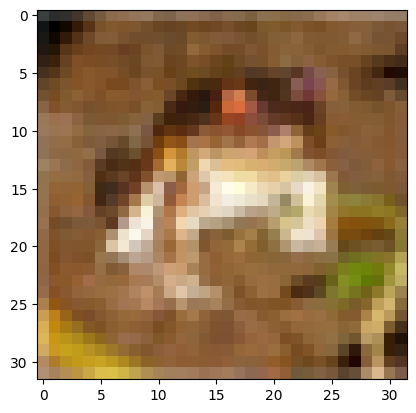

In [7]:
plt.imshow(X_train[0])

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
#scaling

X_train = X_train/255
X_test = X_test/255

#one hot encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

#flatten the image

X_train = X_train.reshape(50000, 32*32*3)
X_test = X_test.reshape(10000, 32*32*3)

In [39]:
#Model Building

tf.keras.backend.clear_session()

model1  = Sequential()

#1st Layer
model1.add(Dense(200, activation='relu', input_shape=(32*32*3, )))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))


#2nd Layer
model1.add(Dense(200, activation='relu'))

#3rd Layer
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

#4th Layer
model1.add(Dense(100, activation='relu'))

#5th Layer
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.2))

model1.add(Dense(64, activation='relu'))

model1.add(Dense(10, activation='softmax'))
model1.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 200)                 │         614,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200)                 │             800 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 703,814 (2.68 MB)

 Trainable params: 703,014 (2.68 MB)

 Non-trainable params: 800 (3.12 KB)

In [40]:
#sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
#model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
#https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
callback2 = tf.keras.callbacks.ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, mode='min')

In [45]:
history = model1.fit (X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), callbacks=[callback1, callback2])

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4540 - loss: 1.5330 - val_accuracy: 0.4869 - val_loss: 1.4432
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4569 - loss: 1.5272 - val_accuracy: 0.4438 - val_loss: 1.5343
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4484 - loss: 1.5339 - val_accuracy: 0.4651 - val_loss: 1.4907
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4627 - loss: 1.5133 - val_accuracy: 0.4782 - val_loss: 1.4719
